In [18]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.transform import resize
from skimage.io import imread
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [19]:
datadir = "E:/desktop/master_assign/ece9039/project/garbage_classification/"

categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [20]:
flat_data_arr = []
target_arr = []

In [21]:
# Loop through each subdirectory in the image directory
for i in categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized=resize(img_array,(224,224,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : battery
loaded category:battery successfully
loading... category : biological
loaded category:biological successfully
loading... category : brown-glass
loaded category:brown-glass successfully
loading... category : cardboard
loaded category:cardboard successfully
loading... category : clothes
loaded category:clothes successfully
loading... category : green-glass
loaded category:green-glass successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : shoes
loaded category:shoes successfully
loading... category : trash
loaded category:trash successfully
loading... category : white-glass
loaded category:white-glass successfully


In [22]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [23]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.996078,0.992157,0.984314,0.996078,0.992157,0.984314,0.996078,0.992157,0.984314,0.996078,...,0.992139,0.996078,0.988244,0.992139,0.996078,0.988244,0.992139,0.996078,0.988235,0.992157
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.882353,0.874510,0.878431,0.882353,0.874510,0.878431,0.882353,0.874510,0.878431,0.882353,...,0.921560,0.913734,0.913734,0.921560,0.913734,0.913734,0.921560,0.913726,0.913726,0.921551
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [25]:
# Create a KNN classifier and fit the training data
from sklearn.metrics import accuracy_score
K_values = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracy = []
best_k = None
best_score = 0
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy = np.append(accuracy, score)
    if score > best_score:
        best_score = score
        best_k = k
        
print("Best k value:", best_k)

Best k value: 12


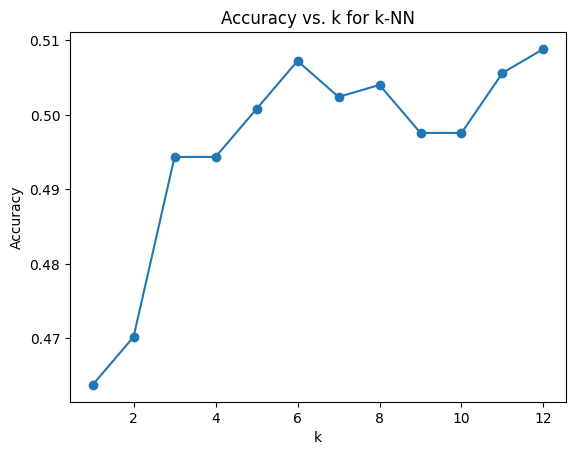

In [26]:
import matplotlib.pyplot as plt
plt.plot(K_values, accuracy, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN')
plt.show()

In [27]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Test accuracy:', score)

Test accuracy: 0.5088566827697263


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.26      0.40        46
           1       0.20      0.02      0.04        46
           2       0.38      0.15      0.22        33
           3       0.34      0.61      0.44        38
           4       0.63      0.97      0.77       211
           5       1.00      0.16      0.28        25
           6       0.19      0.12      0.15        24
           7       0.53      0.22      0.31        36
           8       0.33      0.41      0.37        39
           9       0.50      0.09      0.16        64
          10       0.37      0.80      0.50        35
          11       0.19      0.21      0.20        24

    accuracy                           0.51       621
   macro avg       0.46      0.34      0.32       621
weighted avg       0.51      0.51      0.44       621



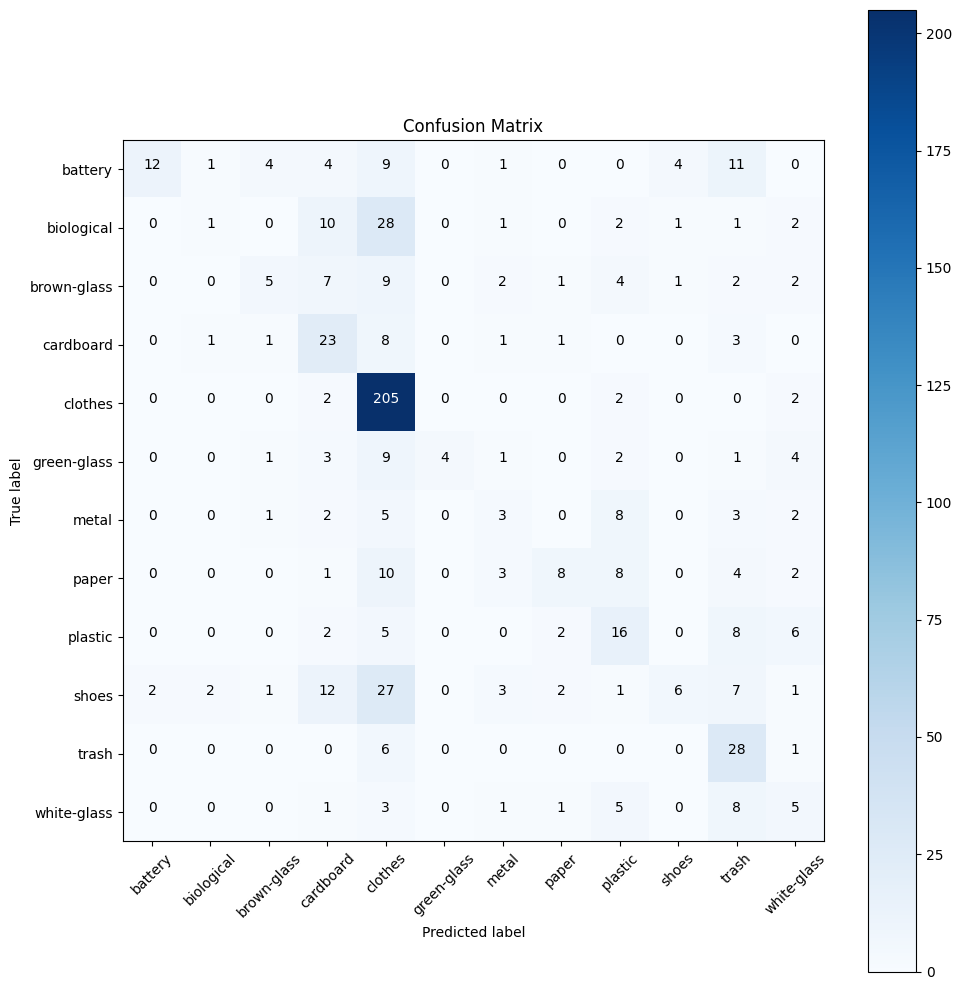

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, categories, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

In [40]:
from sklearn.ensemble import RandomForestClassifier
n = [10,50,100,200]
acc = []
best_n = None
best_score = 0
for N in n:
    myRandomForest = RandomForestClassifier(N)
    myRandomForest.fit(X_train, y_train)
    RF_y_pred = myRandomForest.predict(X_test)
    score_RF = accuracy_score(y_test, RF_y_pred)
    acc = np.append(acc, score_RF)
    if score_RF > best_score:
        best_score = score_RF
        best_n = N

print("Best n value:",  best_n)


Best n value: 100


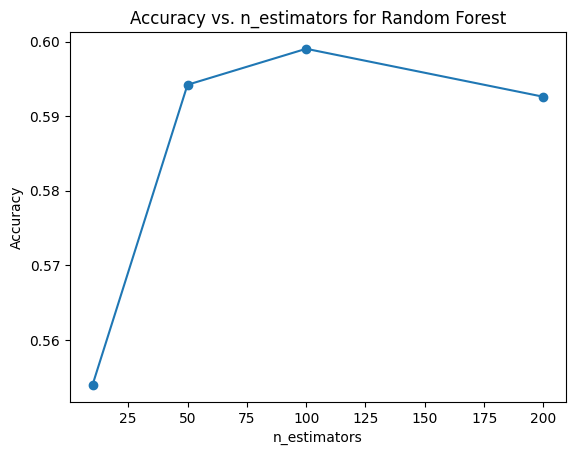

In [42]:
plt.plot(n, acc, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators for Random Forest')
plt.show()

In [43]:
myRandomForest = RandomForestClassifier()
myRandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
RF_y_pred = myRandomForest.predict(X_test)
score_RF = accuracy_score(y_test, RF_y_pred)
print('Test accuracy:', score_RF)

Test accuracy: 0.605475040257649


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.57      0.68        46
           1       0.68      0.37      0.48        46
           2       0.60      0.18      0.28        33
           3       0.67      0.47      0.55        38
           4       0.66      0.99      0.79       211
           5       0.82      0.36      0.50        25
           6       0.25      0.17      0.20        24
           7       0.46      0.44      0.45        36
           8       0.53      0.41      0.46        39
           9       0.37      0.44      0.40        64
          10       0.59      0.66      0.62        35
          11       0.56      0.21      0.30        24

    accuracy                           0.61       621
   macro avg       0.59      0.44      0.48       621
weighted avg       0.61      0.61      0.58       621



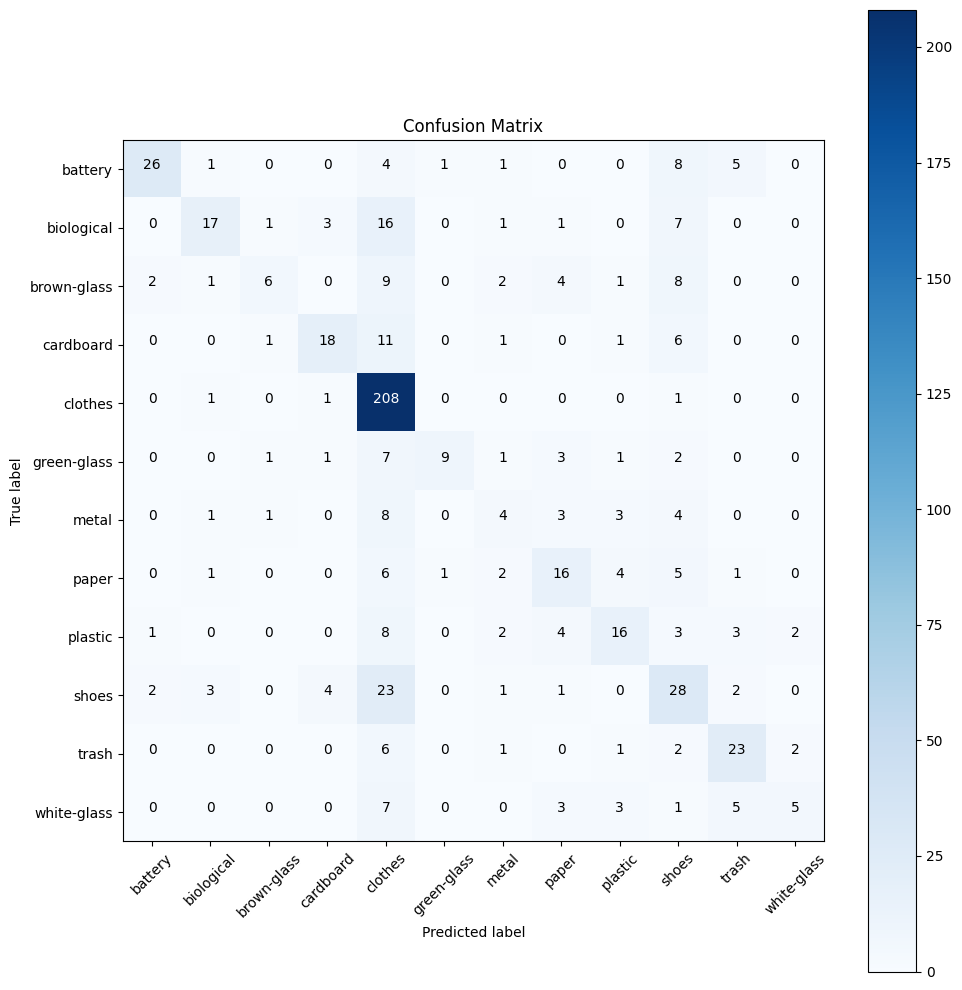

In [45]:
# Confusion Matrix
cm_RF = confusion_matrix(y_test, RF_y_pred)
plot_confusion_matrix(cm_RF, categories, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(y_test, RF_y_pred))